<a href="https://colab.research.google.com/github/Hanbi-Kim/Git-Test/blob/main/AutoEncoder_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt

In [4]:
# 커널  SVM

# 라이브러리 가져오기
import numpy as np
import pandas as pd

# 데이터 읽어오기
# 데이터 로드 (깃허브에 올려서 로드했습니다.. 만약에 코랩에서 다른 데이터 로드해서 하시려면 업로드하고 경로를 여기에 쓰시면 됩니다.)
dataset1 = pd.read_csv("https://raw.githubusercontent.com/Hanbi-Kim/Git-Test/main/health_data_with_header_2.csv")
# dataset1 = pd.read_csv('../health_data_with_header_2.csv')

dataset = dataset1[['age', 'trestbps', 'chol', 'thalach', 'ca', 'sex', 'fbs', 'thal', 'num']]
# 특정 필드의 값이 0인 데이터 필터링
dataset_zero = dataset[dataset['num'] == 0]

# 특정 필드의 값이 1인 데이터 필터링
dataset_one = dataset[dataset['num'] == 1]

'''
# 결과 확인 (옵션)
print("\n num 필드 값이 0인 데이터셋:")
print(dataset_zero.head())
print("\n num 필드 값이 1인 데이터셋:")
print(dataset_one.head())
'''
np.random.seed(42)  # 시드 고정

def augment_data(data, num_augmented_samples, noise_scale=0.03):
    """
    데이터에 잡음을 추가하여 데이터 증강을 수행하는 함수.

    :data: 원본 데이터 세트 (샘플, 특성)
    :num_augmented_samples: 생성할 증강된 샘플의 수
    :noise_scale: 잡음의 스케일 (표준 편차)

    :return: 증강된 데이터 세트
    """
    augmented_data = []
    for _ in range(num_augmented_samples):
        # 원본 데이터에서 무작위 샘플 선택
        sample_index = np.random.randint(0, data.shape[0])
        sample = data[sample_index]

        # 선택된 샘플에 가우시안 잡음 추가
        noise = np.abs(np.random.normal(loc=0.0, scale=noise_scale, size=sample.shape))
        augmented_sample = sample + noise

        # 증강된 샘플을 리스트에 추가
        augmented_data.append(augmented_sample)

    # 증강된 데이터를 numpy 배열로 변환
    augmented_data = np.array(augmented_data)
    return np.vstack((data, augmented_data))  # 원본 데이터와 증강된 데이터 결합

X_zero = dataset_zero.iloc[:, :-1].values
X_one = dataset_one.iloc[:, :-1].values

# 데이터 증강 실행
AX_zero = augment_data(X_zero, num_augmented_samples=500)  # 정상인경우
print(f"원본 정상 데이터 샘플 수: {X_zero.shape[0]}")
print(f"증강된 정상 데이터 샘플 수: {AX_zero.shape[0]}")

AX_one = augment_data(X_one, num_augmented_samples=500)  # 환자인경우
print(f"원본 환자 데이터 샘플 수: {X_one.shape[0]}")
print(f"증강된 환자 데이터 샘플 수: {AX_one.shape[0]}")

'''
AX_zero['target'] = 0
AX_one['target'] = 1
'''
AX_zero_df = pd.DataFrame(AX_zero, columns=['age', 'trestbps', 'chol', 'thalach', 'ca', 'sex', 'fbs', 'thal'])
AX_one_df = pd.DataFrame(AX_one, columns=['age', 'trestbps', 'chol', 'thalach', 'ca', 'sex', 'fbs', 'thal'])

AX_zero_df.to_csv('AX_zero_df.csv', index=False) # 정상데이터만 저장
AX_zero_df['target'] = 0
AX_one_df['target'] = 1

df = pd.concat([AX_zero_df, AX_one_df])
# new_data_set.to_csv('new_data_set.csv', index=False)
'''
# 결과 확인 (옵션)
print("데이터 필드 값이 0인 데이터셋:")
print(X_zero[:5])
print("\n데이터 필드 값이 1인 데이터셋:")
print(X_one[:5])
'''

'''
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 필요하다면 분리된 데이터셋을 새 파일로 저장
dataset_zero.to_csv('filtered_data_zero.csv', index=False)
dataset_one.to_csv('filtered_data_one.csv', index=False)
# 학습데이터와 테스트 데이터 분리
'''

원본 정상 데이터 샘플 수: 160
증강된 정상 데이터 샘플 수: 660
원본 환자 데이터 샘플 수: 137
증강된 환자 데이터 샘플 수: 637


"\nX = dataset.iloc[:, :-1].values\ny = dataset.iloc[:, -1].values\n\n# 필요하다면 분리된 데이터셋을 새 파일로 저장\ndataset_zero.to_csv('filtered_data_zero.csv', index=False)\ndataset_one.to_csv('filtered_data_one.csv', index=False)\n# 학습데이터와 테스트 데이터 분리\n"

In [5]:
!pip install -q -U keras-tuner
import kerastuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


<ipython-input-5-5d7b6944a6ac>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [6]:
# 로드된 데이터 앞 5개 확인
df.head(5)

,age,trestbps,chol,thalach,ca,sex,fbs,thal,target
0,39.0,138.0,220.0,152.0,0.0,0.0,0.0,3.0,0
1,60.0,150.0,240.0,171.0,0.0,0.0,0.0,3.0,0
2,69.0,140.0,239.0,151.0,2.0,0.0,0.0,3.0,0
3,47.0,130.0,253.0,179.0,0.0,1.0,0.0,3.0,0
4,62.0,128.0,208.0,140.0,0.0,1.0,1.0,3.0,0


In [7]:
# 불러온 데이터 기초통계량 확인
df.describe()

,age,trestbps,chol,thalach,ca,sex,fbs,thal,target
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,54.747456,132.053748,249.907568,148.776236,0.738542,0.709825,0.159973,4.860834,0.491133
std,9.170041,17.986045,51.214786,22.593707,0.972193,0.463381,0.347802,1.949454,0.500114
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,48.013616,120.008404,213.005505,132.029698,0.010477,0.031818,0.002855,3.011623,0.000000
50%,56.024153,130.012209,245.000000,152.009955,0.043451,1.003074,0.018937,3.053359,0.000000
75%,62.000000,140.040616,282.014348,165.000000,1.034612,1.021989,0.043584,7.009793,1.000000
max,77.050800,200.023781,564.015449,202.020787,3.086857,1.102269,1.061952,7.104143,1.000000


In [9]:
# num == 1인 데이터는 비정상 데이터임으로 df_abnormal에 할당
df_abnormal = df[df['target'] ==  1]

In [10]:
# num == 0인 데이터는 정상 데이터임으로 df_normal에 할당
df_normal = df[df['target'] ==  0]

In [12]:
# df_normal 데이터를 훈련과 테스트용으로 95:5 비율로 나눔
from sklearn.model_selection import train_test_split
X_train, X_test_normal, y_train, y_test = train_test_split(df_normal.drop('target',axis=1), df_normal['target'],
                                                    test_size=0.20, random_state=42)

In [13]:
# 훈련에 사용할 데이터
X_train.head(5)

,age,trestbps,chol,thalach,ca,sex,fbs,thal
18,41.000000,135.000000,203.000000,132.000000,0.000000,1.000000,0.000000,6.000000
363,51.019781,100.011594,222.010185,143.019373,0.027321,1.002756,0.056556,3.008888
597,41.019941,112.016588,250.030055,179.014927,0.023460,1.022791,0.053132,3.014146
541,42.003633,120.060203,209.008142,173.031716,0.029587,0.042557,0.025285,3.036194
61,66.000000,150.000000,226.000000,114.000000,0.000000,0.000000,0.000000,3.000000


In [14]:
# 테스트에 사용할 정상 데이터
X_test_normal.head(5)

,age,trestbps,chol,thalach,ca,sex,fbs,thal
629,49.036350,134.046454,271.008645,162.012383,0.005580,0.031818,0.054800,3.004230
499,54.009940,132.016002,288.028881,159.029430,1.029738,0.031151,1.032650,3.038381
135,34.000000,118.000000,210.000000,192.000000,0.000000,0.000000,0.000000,3.000000
480,59.007595,138.024610,271.001008,182.013642,0.015493,1.005894,0.006176,3.022397
90,44.000000,130.000000,219.000000,188.000000,0.000000,1.000000,0.000000,3.000000


In [15]:
def autoencoder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=X_train.shape[1]))

    hp_units_first = hp.Int('units', min_value = 16, max_value = 32, step = 2)
    hp_units_second = hp.Int('units', min_value = 8, max_value = 16, step = 2)
    hp_units_last = hp.Int('units', min_value = 4, max_value = 8, step = 2)

    model.add(keras.layers.Dense(units = hp_units_first, activation = 'relu'))
    model.add(keras.layers.Dense(units = hp_units_second, activation = 'relu'))

    model.add(keras.layers.Dense(units = hp_units_last, activation = 'relu'))

    model.add(keras.layers.Dense(units = hp_units_second, activation = 'relu'))
    model.add(keras.layers.Dense(units = hp_units_first, activation = 'relu'))

    model.add(layers.Dense(X_train.shape[1], activation='relu'))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.MeanSquaredError(),
                metrics = ['mse'])

    return model

tuner = kt.Hyperband(autoencoder,
                     objective = 'val_loss',
                     max_epochs = 5000,
                     factor = 3)

tuner.search(X_train, X_train, epochs = 10, validation_data = (X_test_normal, X_test_normal))
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Trial 27 Complete [00h 00m 02s]
val_loss: 13012.3388671875

Best val_loss So Far: 202.27581787109375
Total elapsed time: 00h 01m 01s


In [17]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, X_train, epochs = 5000, batch_size=128,
        validation_split=0.1,
        callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min"),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-10)
    ])

Epoch 1/5000
4/4 [==============================] - 1s 72ms/step - loss: 11804.0283 - mse: 11804.0283 - val_loss: 8877.3643 - val_mse: 8877.3643 - lr: 0.0100
Epoch 2/5000
4/4 [==============================] - 0s 11ms/step - loss: 8199.1768 - mse: 8199.1768 - val_loss: 5866.0513 - val_mse: 5866.0513 - lr: 0.0100
Epoch 3/5000
4/4 [==============================] - 0s 11ms/step - loss: 3443.8018 - mse: 3443.8018 - val_loss: 919.2263 - val_mse: 919.2263 - lr: 0.0100
Epoch 4/5000
4/4 [==============================] - 0s 11ms/step - loss: 922.8492 - mse: 922.8492 - val_loss: 595.9541 - val_mse: 595.9541 - lr: 0.0100
Epoch 5/5000
4/4 [==============================] - 0s 13ms/step - loss: 753.5880 - mse: 753.5880 - val_loss: 680.0022 - val_mse: 680.0022 - lr: 0.0100
Epoch 6/5000
4/4 [==============================] - 0s 12ms/step - loss: 649.3632 - mse: 649.3632 - val_loss: 475.8193 - val_mse: 475.8193 - lr: 0.0100
Epoch 7/5000
4/4 [==============================] - 0s 11ms/step - loss: 387

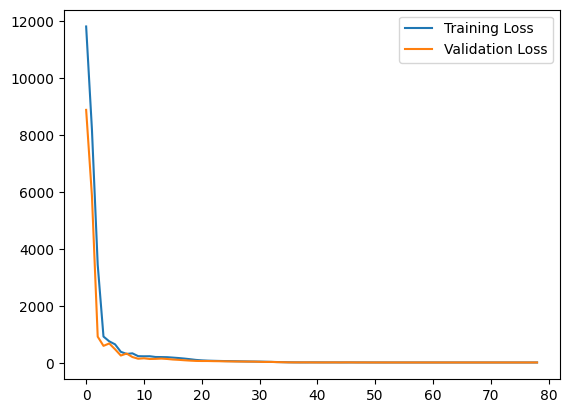

In [18]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

17/17 [==============================] - 0s 1ms/step


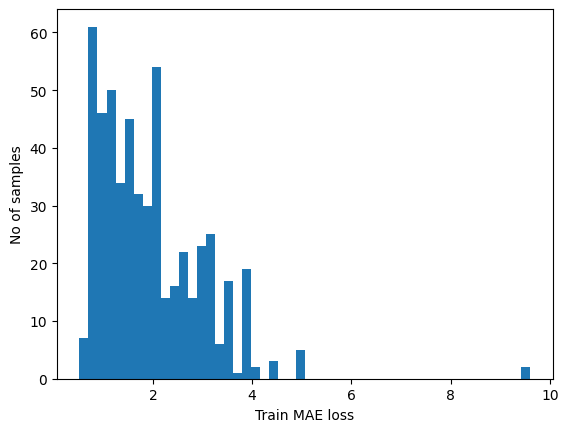

Reconstruction error threshold:  9.608678762053813


In [19]:
# Get train MAE loss.
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [20]:
# 정상 테스트 데이터
X_test_normal

,age,trestbps,chol,thalach,ca,sex,fbs,thal
629,49.036350,134.046454,271.008645,162.012383,0.005580,0.031818,0.054800,3.004230
499,54.009940,132.016002,288.028881,159.029430,1.029738,0.031151,1.032650,3.038381
135,34.000000,118.000000,210.000000,192.000000,0.000000,0.000000,0.000000,3.000000
480,59.007595,138.024610,271.001008,182.013642,0.015493,1.005894,0.006176,3.022397
90,44.000000,130.000000,219.000000,188.000000,0.000000,1.000000,0.000000,3.000000
...,...,...,...,...,...,...,...,...
77,42.000000,120.000000,295.000000,162.000000,0.000000,1.000000,0.000000,3.000000
530,52.003632,118.001104,186.050100,190.015950,0.016668,1.072878,0.005880,6.049879
407,43.007131,122.005767,213.029426,165.022267,0.064847,0.007667,0.029660,3.040543
234,68.046672,118.083539,277.004841,151.023264,1.014151,1.045893,0.031165,7.020946


In [21]:
# 정상 테스트 데이터의 예측 값
X_test_normal_pred = pd.DataFrame(model.predict(X_test_normal), columns=X_test_normal.columns)
X_test_normal_pred

5/5 [==============================] - 0s 2ms/step


,age,trestbps,chol,thalach,ca,sex,fbs,thal
0,54.677067,131.821747,270.389191,162.575943,0.0,0.0,0.0,0.0
1,56.367168,131.766205,287.417877,159.104202,0.0,0.0,0.0,0.0
2,39.655666,115.664085,209.423584,192.428726,0.0,0.0,0.0,0.0
3,55.424923,139.762848,271.123047,182.928543,0.0,0.0,0.0,0.0
4,46.479176,129.418640,218.947083,188.808899,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
127,50.527081,117.302109,294.069153,162.739914,0.0,0.0,0.0,0.0
128,40.763508,121.586510,186.905029,188.788651,0.0,0.0,0.0,0.0
129,45.431225,120.911247,212.807907,165.390030,0.0,0.0,0.0,0.0
130,53.217796,122.893715,277.564148,148.766022,0.0,0.0,0.0,0.0


In [22]:
# 비정상 테스트 데이터
df_abnormal
X_test_abnormal = df_abnormal.drop("target", axis=1)
X_test_abnormal

,age,trestbps,chol,thalach,ca,sex,fbs,thal
0,58.000000,120.000000,284.000000,160.000000,0.000000,1.000000,0.000000,3.000000
1,50.000000,140.000000,233.000000,163.000000,1.000000,1.000000,0.000000,7.000000
2,61.000000,145.000000,307.000000,146.000000,0.000000,0.000000,0.000000,7.000000
3,70.000000,160.000000,269.000000,112.000000,1.000000,1.000000,0.000000,7.000000
4,66.000000,112.000000,212.000000,132.000000,1.000000,1.000000,0.000000,3.000000
...,...,...,...,...,...,...,...,...
632,58.010240,114.075158,318.009520,140.004167,3.025408,1.017149,0.038183,6.047371
633,45.001578,142.057833,309.017899,147.032007,3.043263,1.005656,0.057399,7.001504
634,63.075269,130.023063,330.013771,132.017452,3.006562,1.005004,1.000360,7.029341
635,62.015719,150.064459,244.000325,154.008394,0.027308,0.005940,0.022684,3.025091


In [23]:
# 정상 테스트 데이터의 예측 값
X_test_abnormal_pred = pd.DataFrame(model.predict(X_test_abnormal), columns=X_test_abnormal.columns)
X_test_abnormal_pred

20/20 [==============================] - 0s 4ms/step


,age,trestbps,chol,thalach,ca,sex,fbs,thal
0,52.157513,122.680672,284.054047,160.768478,0.0,0.0,0.0,0.0
1,54.340405,137.437958,232.850021,160.843460,0.0,0.0,0.0,0.0
2,64.067238,142.366043,306.487793,144.086807,0.0,0.0,0.0,0.0
3,72.043442,158.324036,269.251556,109.947266,0.0,0.0,0.0,0.0
4,48.743507,118.976631,213.161118,132.180389,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
632,54.536541,115.123573,317.380280,137.459457,0.0,0.0,0.0,0.0
633,61.310734,135.261414,307.513275,144.027496,0.0,0.0,0.0,0.0
634,62.664387,130.197754,329.389832,129.040070,0.0,0.0,0.0,0.0
635,61.164234,150.152130,244.195114,154.646332,0.0,0.0,0.0,0.0


# 최종 결과 Max Threshold 사용

In [24]:
threshold = np.max(train_mae_loss)

# 비정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_abnormal['MAE'] = np.mean(np.abs(X_test_abnormal_pred - X_test_abnormal.reset_index(drop=True)), axis=1).tolist()
X_test_abnormal['Result'] = X_test_abnormal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")
# 정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_normal['MAE'] = np.mean(np.abs(X_test_normal_pred - X_test_normal.reset_index(drop=True)), axis=1).tolist()
X_test_normal['Result'] = X_test_normal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

In [25]:
# 정상 테스트 8개 중 8개를 정상으로 판단
X_test_normal['Result'].value_counts()

Normal    132
Name: Result, dtype: int64

In [26]:
# 비정상 테스트 137개 중 137개를 정상으로 판단
X_test_abnormal['Result'].value_counts()

Normal    637
Name: Result, dtype: int64

# 최종 결과 3rd Quantile 사용

In [27]:
# Get reconstruction loss threshold.
threshold = np.percentile(train_mae_loss,0.75)

In [28]:
# 정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_normal['MAE'] = np.mean(np.abs(X_test_normal_pred - X_test_normal.reset_index(drop=True)), axis=1).tolist()
X_test_normal['Result'] = X_test_normal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

# 비정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_abnormal['MAE'] = np.mean(np.abs(X_test_abnormal_pred - X_test_abnormal.reset_index(drop=True)), axis=1).tolist()
X_test_abnormal['Result'] = X_test_abnormal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

In [29]:
# 정상 테스트 8개 중 8개를 정상으로 판단
X_test_normal['Result'].value_counts()

Abnomal    131
Normal       1
Name: Result, dtype: int64

In [30]:
# 비정상 테스트 137개 중 1 정상으로 136개를 비정상으로 판단
X_test_abnormal['Result'].value_counts()

Abnomal    636
Normal       1
Name: Result, dtype: int64